In [25]:
from sklearn import model_selection
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_classification, make_regression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<AxesSubplot:xlabel='x1', ylabel='x2'>

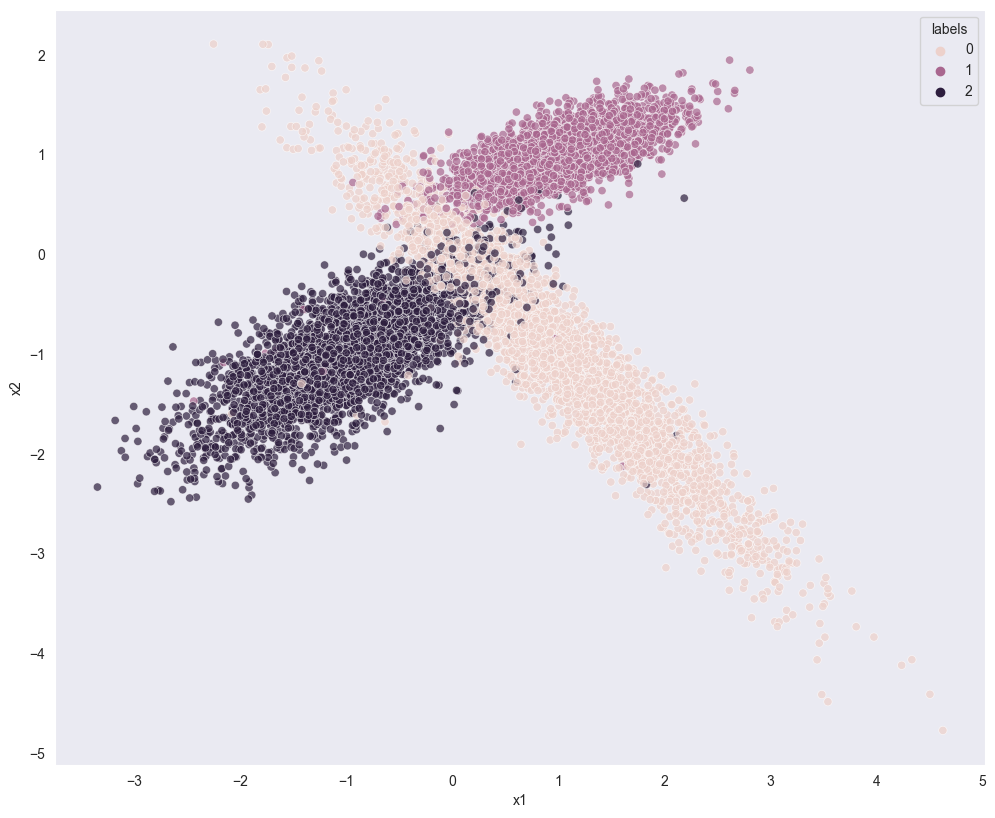

In [49]:
X, Y = make_classification(n_samples=10000,
                           n_features=2,
                           n_redundant=0,
                           n_classes=3, n_clusters_per_class=1, random_state=42)
dataset_1 = pd.DataFrame(data=X, columns=["x1" ,"x2"])
dataset_2 = pd.DataFrame(data=Y, columns=["labels"])
dataset = dataset_1.merge(dataset_2, left_index=True, right_index=True)
plt.rcParams.update({"figure.dpi": 100, "font.size": 10})
sns.set_style("dark")
sns.scatterplot(x="x1", y="x2", data=dataset, hue=dataset["labels"], hue_order=["1", "0", "2"], alpha=0.7)

In [26]:
train_data, test_data = model_selection.train_test_split(dataset, test_size=0.2)

In [28]:
gmm = GaussianMixture(n_components=3, n_init=10)
gmm.fit(train_data.loc[:, ["x1", "x2"]])

GaussianMixture(n_components=3, n_init=10)

In [53]:
# parameters

print("phi: ",gmm.weights_)
print("\n")
print("mu:", gmm.means_)
print("\n")
print("sigma: ", gmm.covariances_)
print("\n")
print("Convergence Status: ", gmm.converged_)
print("n_iters: ", gmm.n_iter_)

phi:  [0.33284025 0.33464336 0.33251639]


mu: [[ 1.01283585 -1.01465664]
 [ 0.99728672  0.99653607]
 [-0.99840859 -0.99444078]]


sigma:  [[[ 0.93934654 -0.94341549]
  [-0.94341549  1.04786013]]

 [[ 0.25461005  0.08328447]
  [ 0.08328447  0.06104045]]

 [[ 0.46637951  0.24755613]
  [ 0.24755613  0.24011964]]]


Convergence Status:  True
n_iters:  7
[-1.89025859 -3.86817165 -2.73059838 ... -2.15161518 -2.03438283
 -4.42429177]


(array([[ 2.29226179, -2.27671905],
       [-0.14659162,  0.76067677],
       [ 0.9550097 ,  0.68128383],
       [ 1.44279195,  1.0497671 ],
       [ 1.32196178,  1.06379365],
       [ 1.48904575,  1.34370074],
       [-1.83412157, -1.38588174],
       [-1.65998616, -1.02192337],
       [-0.64309649, -0.84906437],
       [-0.260135  , -0.84275298]]), array([0, 1, 1, 1, 1, 1, 2, 2, 2, 2]))


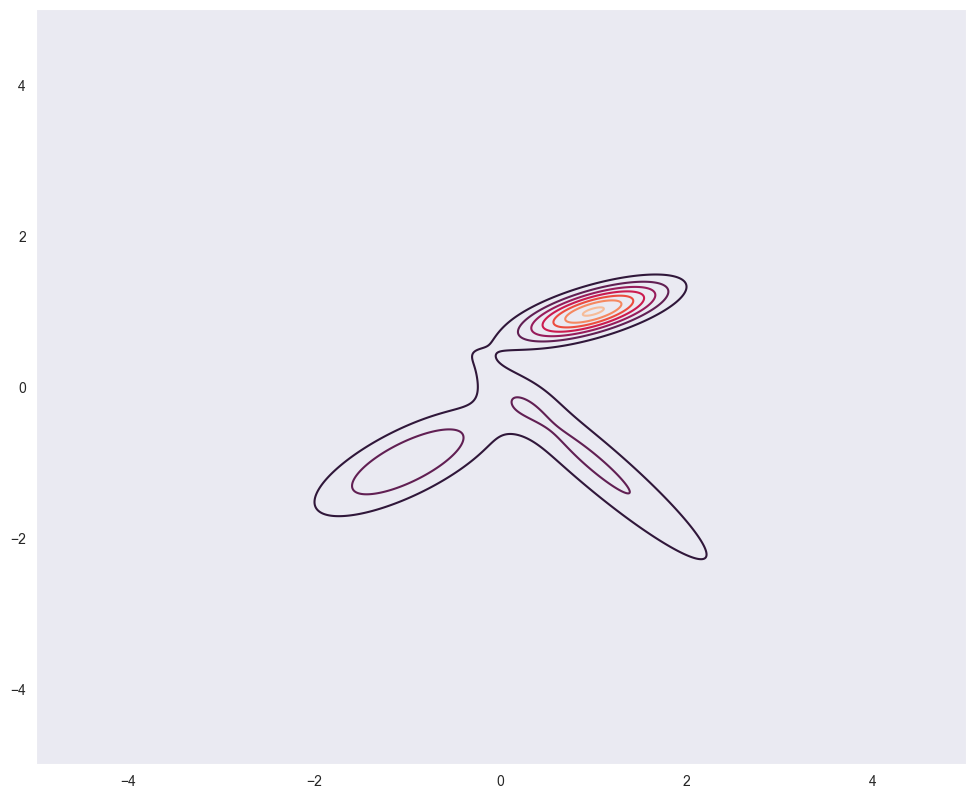

In [71]:
# Generative Model
sample = gmm.sample(n_samples=10)
print(sample)

x = np.linspace(-5., 5., 8000)
y = np.linspace(-5., 5., 8000)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
z =  np.exp(gmm.score_samples(XX).reshape(X.shape))
plt.contour(X, Y,
           z)

[ 1  2  3  4  5  6  7  8  9 10]


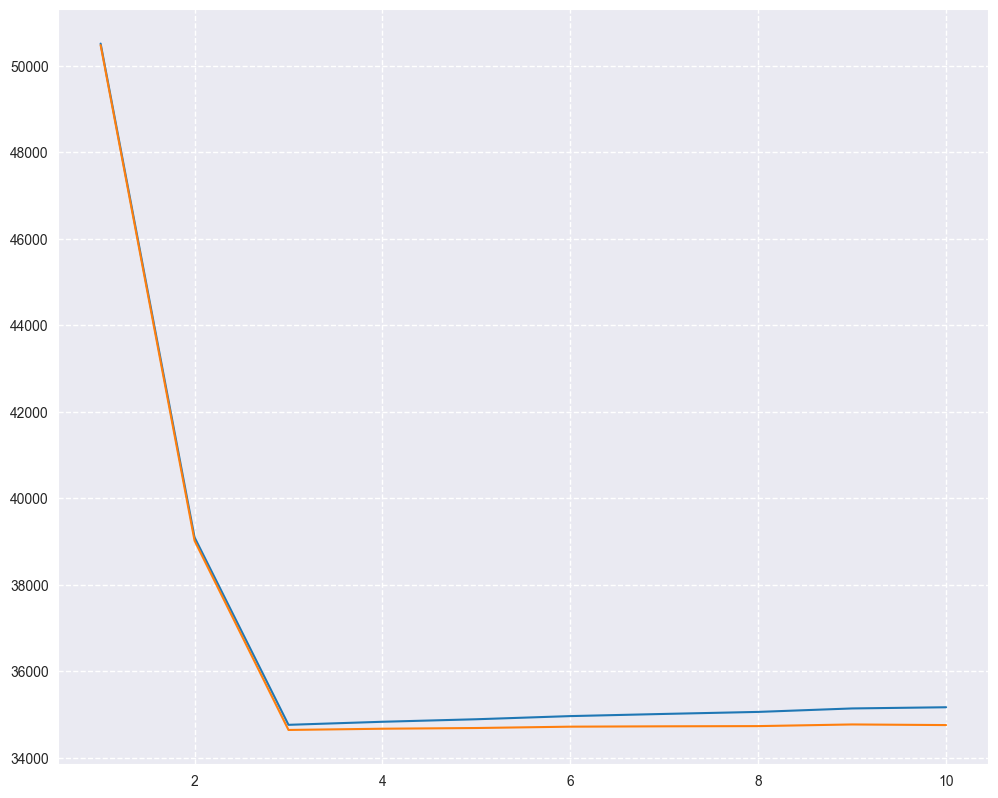

In [46]:
bic_scores = []
aic_scores = []
for i in range(10):
    gm = GaussianMixture(n_components=i+1, n_init=10)
    gm.fit(train_data.iloc[:, [0, 1]])
    bic_scores.append(gm.bic(train_data.iloc[:, [0, 1]]))
    aic_scores.append(gm.aic(train_data.loc[:, ["x1", "x2"]]))

x = np.arange(1, 11)
print(x)
sns.set_style("dark")
plt.plot(x, bic_scores)
plt.plot(x, aic_scores)
plt.grid(linestyle="--", linewidth=1, c="w")

